<p>Define:<br>$x_n = (1248^n \bmod 32323) - 16161$<br>$y_n = (8421^n \bmod 30103) - 15051$<br>
$P_n = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}$
</p>

<p>For example, $P_8 = \{(-14913, -6630),$$(-10161, 5625),$$(5226, 11896),$$(8340, -10778),$$(15852, -5203),$$(-15165, 11295),$$(-1427, -14495),$$(12407, 1060)\}$.</p>

<p>Let $C(n)$ be the number of triangles whose vertices are in $P_n$ which contain the origin in the interior.</p>

<p>
Examples:<br>
$C(8) = 20$<br>
$C(600) = 8950634$<br>
$C(40\,000) = 2666610948988$
</p>

<p>Find $C(2\,000\,000)$.
</p>

In [1]:
x_n: int = lambda n: ((1248 ** n) % 32323) - 16161
y_n: int = lambda n: ((8421 ** n) % 30103) - 15051

if __name__ == "__main__":
    x_8: list = [x_n(i) for i in range(1, 9)]
    y_8: list = [y_n(i) for i in range(1, 9)]
    P_8: object = zip(x_8, y_8)
    
    print("P_8 = {}".format(list(P_8)))

    # TODO: calculate and store all (x_n, y_n) for n: [1, 2000000]

    # there has to be some mathematical wizardry I can use to make this go faster
    # -- soln. using C makes this program faster
    for i in range(1, 21):
        print("i: {0}, x_n: {1}".format(i, x_n(i)))

P_8 = [(-14913, -6630), (-10161, 5625), (5226, 11896), (8340, -10778), (15852, -5203), (-15165, 11295), (-1427, -14495), (12407, 1060)]
i: 1, x_n: -14913
i: 2, x_n: -10161
i: 3, x_n: 5226
i: 4, x_n: 8340
i: 5, x_n: 15852
i: 6, x_n: -15165
i: 7, x_n: -1427
i: 8, x_n: 12407
i: 9, x_n: -15566
i: 10, x_n: 15293
i: 11, x_n: -1691
i: 12, x_n: 6165
i: 13, x_n: -15739
i: 14, x_n: -6673
i: 15, x_n: -5355
i: 16, x_n: -8964
i: 17, x_n: 12224
i: 18, x_n: 14634
i: 19, x_n: -16048
i: 20, x_n: -4429


In [2]:
# finding combinations

from itertools import combinations

x_n: int = lambda n: ((1248 ** n) % 32323) - 16161
y_n: int = lambda n: ((8421 ** n) % 30103) - 15051

if __name__ == "__main__":
    x_8: list = [x_n(i) for i in range(1, 9)]
    y_8: list = [y_n(i) for i in range(1, 9)]
    P_8: object = list(zip(x_8, y_8))
    
    print("P_10 = {}".format(P_8))
    
    coms: object = list(combinations(P_8, 3))
    for i in range(0, len(coms)):
        print("i: {0}, Triangle Combination of P_8: {1}".format(i, coms[i]))

P_10 = [(-14913, -6630), (-10161, 5625), (5226, 11896), (8340, -10778), (15852, -5203), (-15165, 11295), (-1427, -14495), (12407, 1060)]
i: 0, Triangle Combination of P_8: ((-14913, -6630), (-10161, 5625), (5226, 11896))
i: 1, Triangle Combination of P_8: ((-14913, -6630), (-10161, 5625), (8340, -10778))
i: 2, Triangle Combination of P_8: ((-14913, -6630), (-10161, 5625), (15852, -5203))
i: 3, Triangle Combination of P_8: ((-14913, -6630), (-10161, 5625), (-15165, 11295))
i: 4, Triangle Combination of P_8: ((-14913, -6630), (-10161, 5625), (-1427, -14495))
i: 5, Triangle Combination of P_8: ((-14913, -6630), (-10161, 5625), (12407, 1060))
i: 6, Triangle Combination of P_8: ((-14913, -6630), (5226, 11896), (8340, -10778))
i: 7, Triangle Combination of P_8: ((-14913, -6630), (5226, 11896), (15852, -5203))
i: 8, Triangle Combination of P_8: ((-14913, -6630), (5226, 11896), (-15165, 11295))
i: 9, Triangle Combination of P_8: ((-14913, -6630), (5226, 11896), (-1427, -14495))
i: 10, Triangle

In [3]:
# PE102 MAIN PROGRAM

FILENAME: str = "0102_triangles.txt"

# classify a triangle object to encapsulate coordinate data

class Triangle:
    '''
    - this object will calculate the parameters of a triangle (area)
    based on three vertex corrdinates provided as an input.
    
    - vertex coordinates are input as follows for triangle ABC
    -- ax, ay, bx, by, cx, cy
    
    - TODO: expand this object to find more parameters (perim, line vectors, etc..)
    -- useful for computer graphics library implementation
    -- is this always the case (mathematically) for points P inside and outside of 
    trangle ABC to create equal sub-area parts?
    '''
    def __init__(self, ax: int, ay: int, bx: int, by: int, cx: int, cy: int) -> None:
        self.a_x = ax
        self.a_y = ay
        self.b_x = bx
        self.b_y = by
        self.c_x = cx
        self.c_y = cy
    
    def get_area(self) -> float:
        '''
        - calculates the are of the triangle given its vertex coordinates
        - may return a negative area based on coordinates, so ensure
        sign by returning the absolute value
        '''
        term1: int = self.a_x * (self.b_y - self.c_y)
        term2: int = self.b_x * (self.c_y - self.a_y)
        term3: int = self.c_x * (self.a_y - self.b_y)
        return abs(0.5 * (term1 + term2 + term3))
    

if __name__ == "__main__":
    # read file data
    data_arr: list = []
    with open(FILENAME, "r") as file:
        data: str = file.read()
        data_arr = data.split("\n")
    file.close()

    # program counter (inc. if origin is contained in triangle)
    counter: int = 0

    # map str in each line of arr to (ax, ay, bx, by, cx, cy)
    # where each (_x, _y) is of type int
    for line in data_arr:
        ax, ay, bx, by, cx, cy = map(int, line.split(","))
        
        ABC: object = Triangle(ax, ay, bx, by, cx, cy)
    
        PAB: object = Triangle(0, 0, ax, ay, bx, by)
        PBC: object = Triangle(0, 0, bx, by, cx, cy)
        PAC: object = Triangle(0, 0, ax, ay, cx, cy)
    
        if PAB.get_area() + PBC.get_area() + PAC.get_area() == ABC.get_area():
            counter += 1
    
    print("How many triangles have the origin P = (0, 0) contained? {}".format(counter))

FileNotFoundError: [Errno 2] No such file or directory: '0102_triangles.txt'

<p>An observation can be made that- </p>
\begin{equation}
\frac{C(8)}{nCr(8, 3)} = \frac{20}{56} \approx 0.357
\end{equation}

\begin{equation}
\frac{C(600)}{nCr(600, 3)} \approx 0.29487...
\end{equation}

\begin{equation}
\frac{C(40000)}{nCr(40000, 3)} \approx 0.25001...
\end{equation}

<p>where $nCr(n, r)$ is the defined combination formula- </p>
\begin{equation}
nCr(n, r) = \frac{n!}{r!(n - r)!}
\end{equation}

<p>Therefore, a hypothesis can be made that as $n$ expands to infinity, a limit converges to a finite value as follows- </p>
\begin{equation}
\lim_{n \to \infty} f(n) = \lim_{n \to \infty} \frac{C(n)}{nCr(n, 3)} = 0.25
\end{equation}
<p>indicating that given $x_n$ and $y_n$, only about a quarter of triangles that can be made with combinations of vertices $(x_i, y_i)$ contain the origin in its interior.</p>

<p>A rough approximation can be made for solving PE456 by assuming the limit has no rate of change, thus producing an incorrect, but close result of-</p>
\begin{equation}
\frac{nCr(2000000, 3)}{4} = C(2000000) = 333332833333500000
\end{equation}

<p>The methods for solving PE456 is now reduced to finding the rate of change of the function $f(n)$ for smaller $n$ to accurately extrapolate the convergence value at $n = 2000000$.</p>

In [4]:
# - This program will count the number of triangles that have the origin contained for a 
# small number of n, as nCr(n, 3) grows exponentially.

from itertools import combinations

FILENAME: str = "vertices.txt"
    
# classify a triangle object to encapsulate coordinate data
class Triangle:
    '''
    - this object will calculate the parameters of a triangle (area)
    based on three vertex corrdinates provided as an input.
    
    - vertex coordinates are input as follows for triangle ABC
    -- ax, ay, bx, by, cx, cy
    
    - TODO: expand this object to find more parameters (perim, line vectors, etc..)
    -- useful for computer graphics library implementation
    -- is this always the case (mathematically) for points P inside and outside of 
    trangle ABC to create equal sub-area parts?
    '''
    def __init__(self, ax: int, ay: int, bx: int, by: int, cx: int, cy: int) -> None:
        self.a_x = ax
        self.a_y = ay
        self.b_x = bx
        self.b_y = by
        self.c_x = cx
        self.c_y = cy
    
    def get_area(self) -> float:
        '''
        - calculates the are of the triangle given its vertex coordinates
        - may return a negative area based on coordinates, so ensure
        sign by returning the absolute value
        '''
        term1: int = self.a_x * (self.b_y - self.c_y)
        term2: int = self.b_x * (self.c_y - self.a_y)
        term3: int = self.c_x * (self.a_y - self.b_y)
        return abs(0.5 * (term1 + term2 + term3))
    

if __name__ == "__main__":
    # read file data
    data_arr: list = []
    with open(FILENAME, "r") as file:
        data: str = file.read()
        data_arr = data.split("\n")
        data_arr = [(int(line.split(", ")[0]), int(line.split(", ")[1])) for line in data_arr[:-1]]
    file.close()

    frac: list = []
    for vn in range(3, 21): # add vertices to the combinations list
        P_n: list = [v for v in data_arr[:vn]]
        coms: object = list(combinations(P_n, 3))
    
        # program counter (inc. if origin is contained in triangle)
        counter: int = 0
        for i in range(0, len(coms)):
            #print("i: {0}, Triangle Combination of P_n: {1}".format(i, coms[i]))

            # map str in each line of arr to (ax, ay, bx, by, cx, cy)
            # where each (_x, _y) is of type int
            # ax, ay, bx, by, cx, cy = map(int, line.split(","))
            ax, ay = coms[i][0][0], coms[i][0][1]
            bx, by = coms[i][1][0], coms[i][1][1]
            cx, cy = coms[i][2][0], coms[i][2][1]

            ABC: object = Triangle(ax, ay, bx, by, cx, cy)

            PAB: object = Triangle(0, 0, ax, ay, bx, by)
            PBC: object = Triangle(0, 0, bx, by, cx, cy)
            PAC: object = Triangle(0, 0, ax, ay, cx, cy)

            if PAB.get_area() + PBC.get_area() + PAC.get_area() == ABC.get_area():
                counter += 1
    
        #print("How many triangles have the origin P = (0, 0) contained? C({0}) = {1}".format(vn, counter))
        #print("C({0}) / nCr({1}, 3) = {2}\n".format(vn, vn, counter / len(coms)))
        frac.append(counter / len(coms))

In [5]:
import matplotlib.pyplot as plt

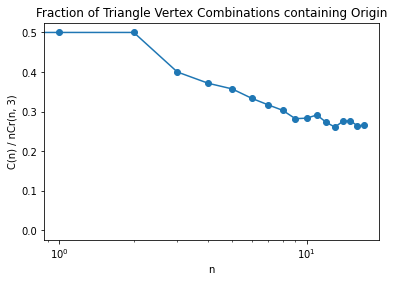

In [6]:
if __name__ == "__main__":
    plt.title("Fraction of Triangle Vertex Combinations containing Origin")
    plt.semilogx()
    plt.xlabel("n")
    plt.ylabel("C(n) / nCr(n, 3)")
    plt.plot([x for x in range(0, len(frac))], frac)
    plt.scatter([x for x in range(0, len(frac))], frac)
    plt.show()

In [7]:
'''
// C++ program to print all combinations of size
// k of elements in set 1..n
#include <bits/stdc++.h>
using namespace std;

void makeCombiUtil(vector<vector<int> >& ans,
    vector<int>& tmp, int n, int left, int k)
{
    // Pushing this vector to a vector of vector
    if (k == 0) {
        ans.push_back(tmp);
        return;
    }

    // i iterates from left to n. First time
    // left will be 1
    for (int i = left; i <= n; ++i)
    {
        tmp.push_back(i);
        makeCombiUtil(ans, tmp, n, i + 1, k - 1);

        // Popping out last inserted element
        // from the vector
        tmp.pop_back();
    }
}

// Prints all combinations of size k of numbers
// from 1 to n.
vector<vector<int> > makeCombi(int n, int k)
{
    vector<vector<int> > ans;
    vector<int> tmp;
    makeCombiUtil(ans, tmp, n, 1, k);
    return ans;
}

// Driver code
int main()
{
    // given number
    int n = 5;
    int k = 3;
    vector<vector<int> > ans = makeCombi(n, k);
    for (int i = 0; i < ans.size(); i++) {
        for (int j = 0; j < ans[i].size(); j++) {
            cout << ans.at(i).at(j) << " ";
        }
        cout << endl;
    }
    return 0;
}

'''

'\n// C++ program to print all combinations of size\n// k of elements in set 1..n\n#include <bits/stdc++.h>\nusing namespace std;\n\nvoid makeCombiUtil(vector<vector<int> >& ans,\n    vector<int>& tmp, int n, int left, int k)\n{\n    // Pushing this vector to a vector of vector\n    if (k == 0) {\n        ans.push_back(tmp);\n        return;\n    }\n\n    // i iterates from left to n. First time\n    // left will be 1\n    for (int i = left; i <= n; ++i)\n    {\n        tmp.push_back(i);\n        makeCombiUtil(ans, tmp, n, i + 1, k - 1);\n\n        // Popping out last inserted element\n        // from the vector\n        tmp.pop_back();\n    }\n}\n\n// Prints all combinations of size k of numbers\n// from 1 to n.\nvector<vector<int> > makeCombi(int n, int k)\n{\n    vector<vector<int> > ans;\n    vector<int> tmp;\n    makeCombiUtil(ans, tmp, n, 1, k);\n    return ans;\n}\n\n// Driver code\nint main()\n{\n    // given number\n    int n = 5;\n    int k = 3;\n    vector<vector<int> > ans 